In [ ]:
#Librerias 
import numpy as np
from matplotlib import pyplot as plt 
from ipywidgets import interact, interactive, fixed, interact_manual

#Funciones 
def c(k):

  return sum(y*np.exp(-1j*w*k*t))/t.size
  #np.trapz(y*np.exp(-1j*w*t)*t/(t[-1]-t[1]))

def f(k):

  return sum((c(k)*np.exp(1j*w*k*t)) for k in range(-k,k+1))


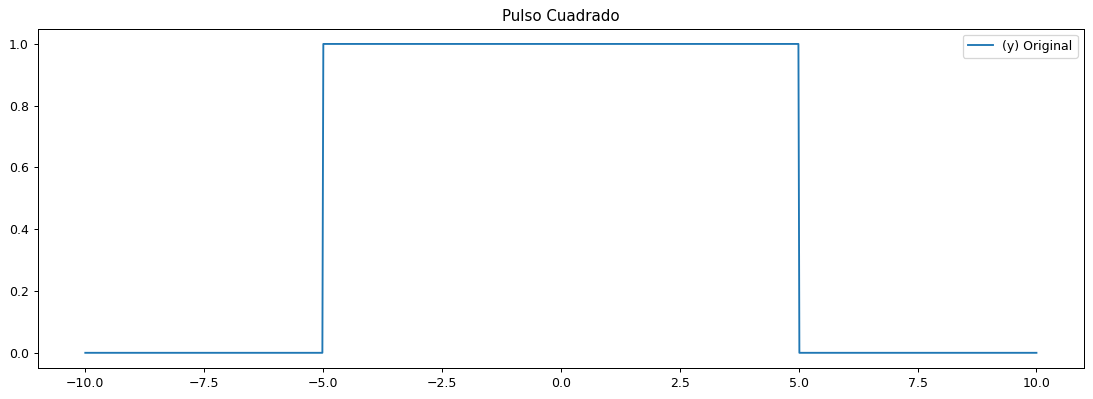

In [ ]:
#señal de Pulso cuadrado 
t=np.linspace(-10,10,1000)
y=np.array([0]*250+[1]*500+[0]*250)
plt.figure(figsize=(15,5),dpi=90)
plt.plot(t,y,label="(y) Original")
plt.title(label="Pulso Cuadrado")
plt.legend()
plt.show()

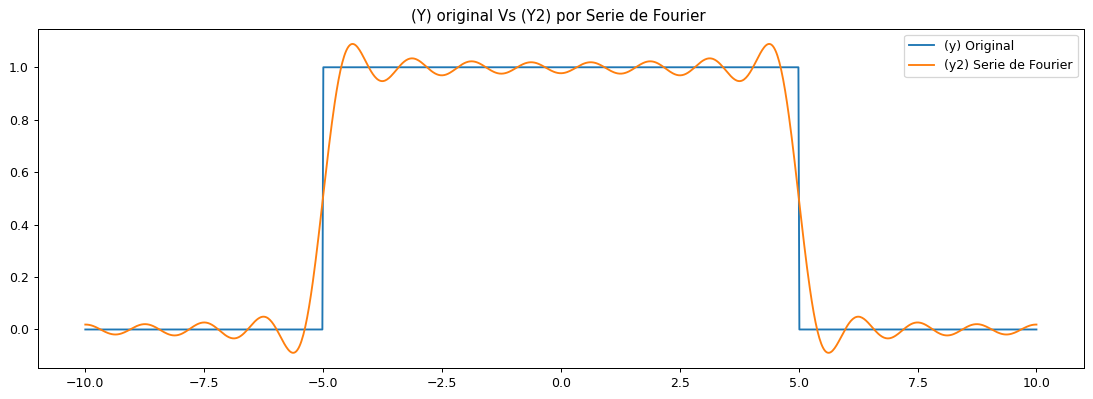

In [ ]:
#Serie de Furier 
w=2*np.pi/(t[-1]-t[1])
plt.figure(figsize=(15,5),dpi=90)
plt.plot(t,y,label="(y) Original")
y2=f(15)
plt.title(label="(Y) original Vs (Y2) por Serie de Fourier ")
plt.plot(t,y2.real,label="(y2) Serie de Fourier")
plt.legend()

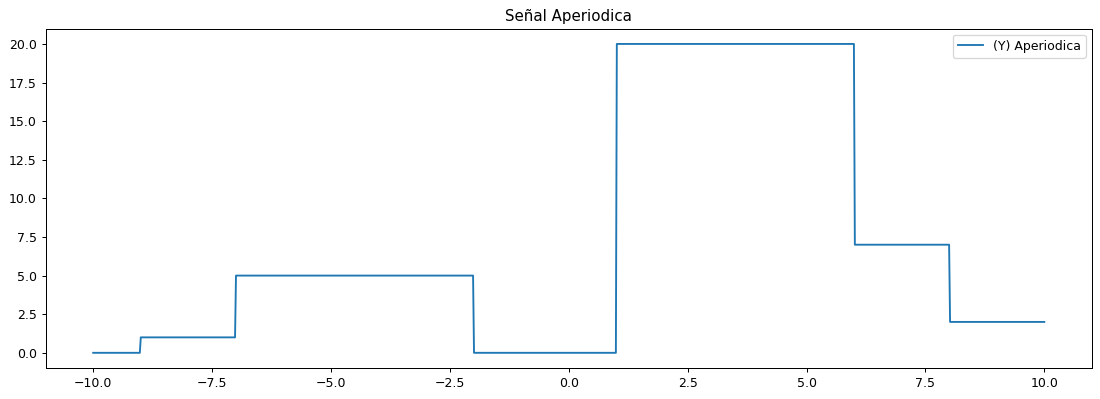

In [ ]:
#Señal aperiodica 
t=np.linspace(-10,10,1000)
y=np.array([0]*50+[1]*100+[5]*250+[0]*150+[20]*250+[7]*100+[2]*100)
plt.figure(figsize=(15,5),dpi=90)
plt.plot(t,y,label="(Y) Aperiodica")
plt.title(label="Señal Aperiodica")
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


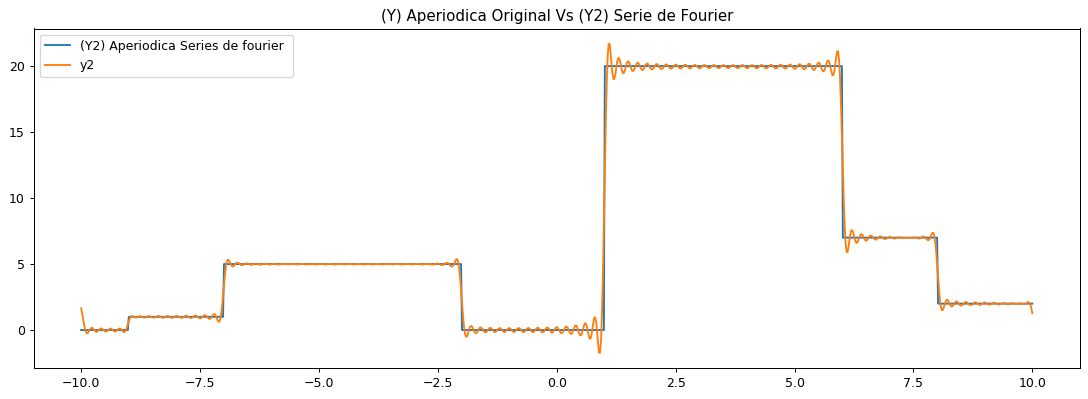

In [ ]:
# Serie de Fourier señal aperiodica

w=2*np.pi/(t[-1]-t[1])
y3=f(100)#numero de coeficientes 
plt.figure(figsize=(15,5),dpi=90)
plt.title(label="(Y) Aperiodica Original Vs (Y2) Serie de Fourier")
plt.plot(t,y,label="(Y2) Aperiodica Series de fourier ")
plt.plot(t,y3,label="y2")
plt.legend()


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


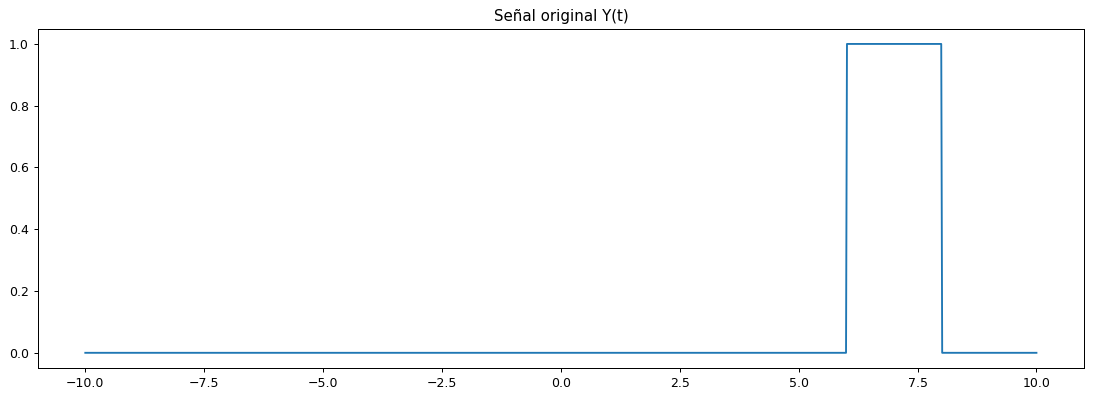

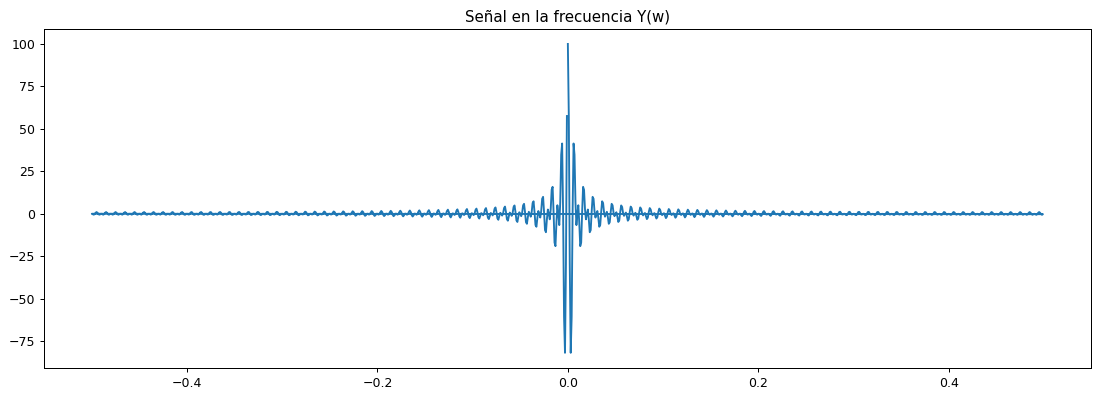

In [ ]:
#Transformada para pulso cuadrado 

#vuelvo a crear pulso cuadrado
n=1000
tx=10
w=2*np.pi/tx
t=np.linspace(-10,tx,n)
y=np.array([0]*800+[1]*100+[0]*100)

#Desarrollando la Transformada 

freq=np.fft.fftfreq(n)
mascara=freq>-10

fft_Calculo=np.fft.fft(y)

#graficos 
plt.figure(figsize=(15,5),dpi=90)
plt.figure(1)
plt.title("Señal original Y(t)")
plt.plot(t,y)

plt.figure(figsize=(15,5),dpi=90)
plt.figure(2)
plt.title("Señal en la frecuencia Y(w)")
plt.plot(freq[mascara],fft_Calculo[mascara])
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


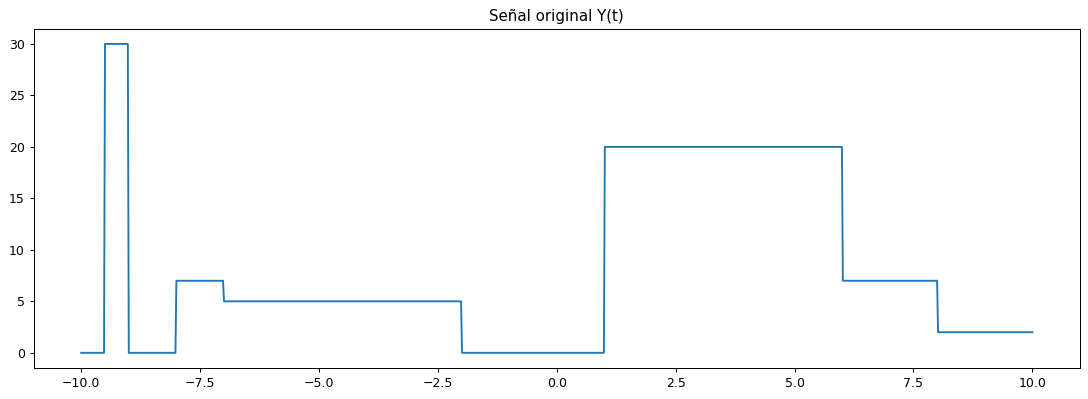

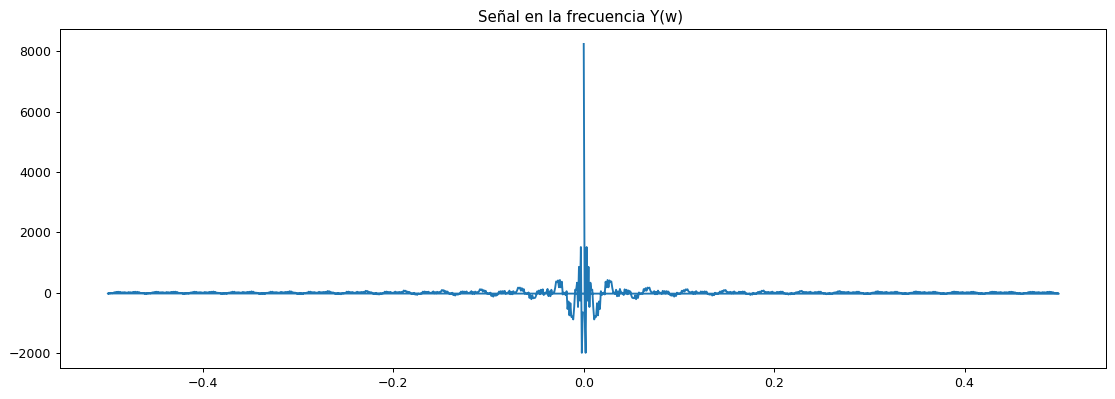

In [ ]:
#Transformada para Señal aperiodica 

#volvemos a crear una señal aperiodica 
n=1000
tx=10
w=2.0*np.pi/tx
t=np.linspace(-10,tx,n)
y2=np.array([0]*25+[30]*25+[0]*50+[7]*50+[5]*250+[0]*150+[20]*250+[7]*100+[2]*100)

#Desarrollando la Transformada 

freq=np.fft.fftfreq(n)
mascara=freq>-10

fft_Calculo=np.fft.fft(y2)

#graficos 
plt.figure(figsize=(15,5),dpi=90)
plt.figure(1)
plt.title("Señal original Y(t)")
plt.plot(t,y2)

plt.figure(figsize=(15,5),dpi=90)
plt.figure(2)
plt.title("Señal en la frecuencia Y(w) ")
plt.plot(freq[mascara],fft_Calculo[mascara])
plt.show()

**Transformada De laplace De Señal periodica**

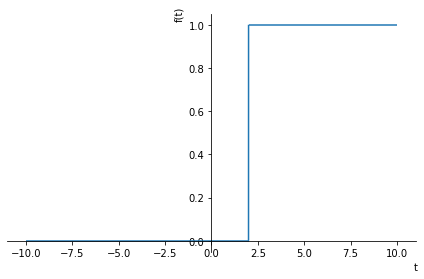

(exp(-2*s)/s, 0, True)

In [ ]:
import sympy as sym
from sympy import Symbol 
from sympy.plotting import plot

t=Symbol("t")
s=Symbol("s")

a=sym.Heaviside(t)
b=sym.Heaviside (t-2)
señal=(b)
us=sym.laplace_transform(señal,t,s)

plot (señal)
us

**Transformada De Laplace Señal Aperiodica**

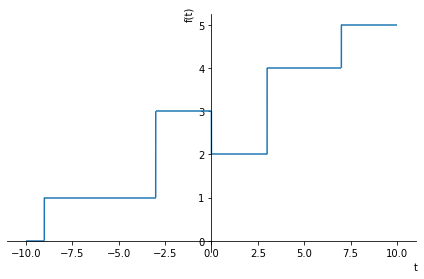

(2/s + 2*exp(-3*s)/s + exp(-7*s)/s, 0, True)

In [ ]:
import sympy as sym
from sympy import Symbol 
from scipy import integrate

t=Symbol("t")
s=Symbol("s")

a=sym.Heaviside(t+9)
b=sym.Heaviside (t)
c=sym.Heaviside(t+3)
d=sym.Heaviside(t-3)
f=sym.Heaviside(t-7)

señal=(a+(-1*b)+2*c+2*d+f)
plot (señal)
us=sym.laplace_transform(señal,t,s)
us

**Solucion de circuito propuesto**

In [ ]:
from sympy.solvers import solve_linear_system 
from sympy import Symbol 
import sympy as sym 
from sympy.matrices import Matrix #Trabajo con matrices

R1 = Symbol('R1')
R2 = Symbol('R2')
C = Symbol('C')


I1 = Symbol('I1')
x = Symbol('x')
jw = Symbol('jw')

In [ ]:
M = Matrix([[(1/(C*jw))+R2+R1]])
I = Matrix([I1])
V = Matrix([x])
M

Matrix([[R1 + R2 + 1/(C*jw)]])

In [ ]:
I

Matrix([[I1]])

In [ ]:
V

Matrix([[x]])

**Funcion de Transferencia Del circuito propuesto**

In [ ]:
solution = solve_linear_system(M.col_insert(1,V), *I)
solution
Y = R1*solution[I1] 
S = M*Matrix(list(solution.values()))
X = S.row(0).col(0) #Fila 0 y columna 0 de la matriz S.
H = Y/X[0,0] 
Hs = H.simplify()
Hs

C*R1*jw/(C*jw*(R1 + R2) + 1)

In [ ]:
#Funcion para hallar la frecuencia de una señal 
def fft_plot(t, y, wmin=None, wmax=None):
    """
    Esta función recibe una señal (con su vector de tiempo) y gráfica 
    su representación en el tiempo y en la frecuencia.
    
    t:  vector de tiempo
    y: señal
    wmin: frecuencia mínima en la gráfica
    wmax: frecuencia máxima en la gráfica
    
    """
    # La frequencia de muestreo la extraigo del vector del tiempo
    sample_rate = t[1] - t[0]
    
    Y = np.abs(fftshift(fft(y)))  # Valor absoluto de Fourier
    Y = Y / Y.shape[0]  # Normalización
    W = fftshift(fftfreq(Y.shape[0], sample_rate))  # Vector de frecuencias
    
    #  Inicializa la figura con un tamaño y densidad de píxeles cómoda
    plt.figure(figsize=(16, 5), dpi=90)
    
    #  Primer plot
    plt.subplot(121)  # 1 fila, 2 columnas, espacio 1
    plt.plot(t, y, color='C0')
    plt.grid(True)
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    
    plt.subplot(122)  # 1 fila, 2 columnas, espacio 2
    plt.plot(W, Y, color='C1')  # grafica el contorno
    plt.fill_between(W, Y, 0, color='C1', alpha=0.3)  # grafica el relleno con una transparencia
    if wmin and wmax:
        plt.xlim(wmin, wmax)
    plt.ylim(0)
    plt.grid(True)
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude')

**Respuesta del circuito a un pulso cuadrado**

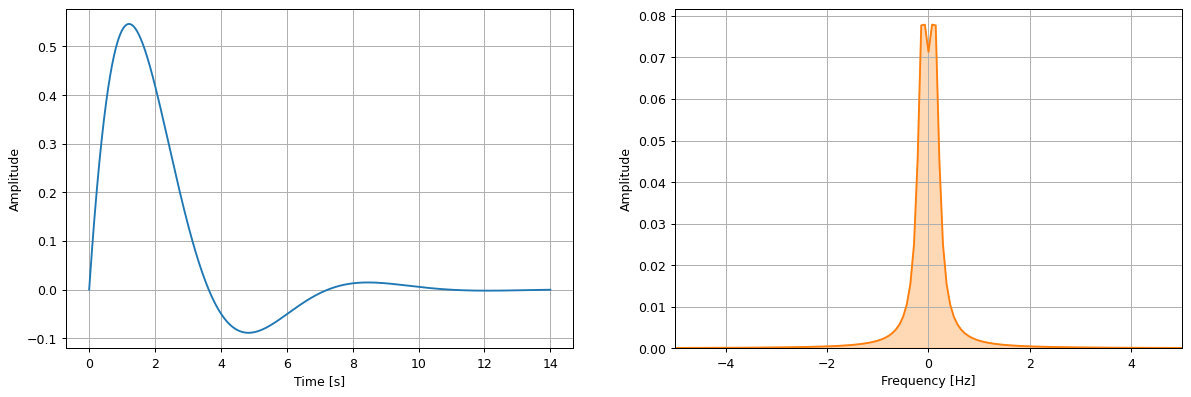

In [ ]:
from scipy.signal import lti
from scipy.fftpack import fft, fftfreq, fftshift

c1=1
r1=1
r2=1
n1=c1*r1
n2=c1*r2
num = [n1,] # b1
den = [n1, n2,1] #a2,a1, a0
t = np.linspace(0, 10, 2000)
lti_system = lti(num, den)
t, h=lti_system.impulse(N=2000)
fft_plot(t,h,-5,5)

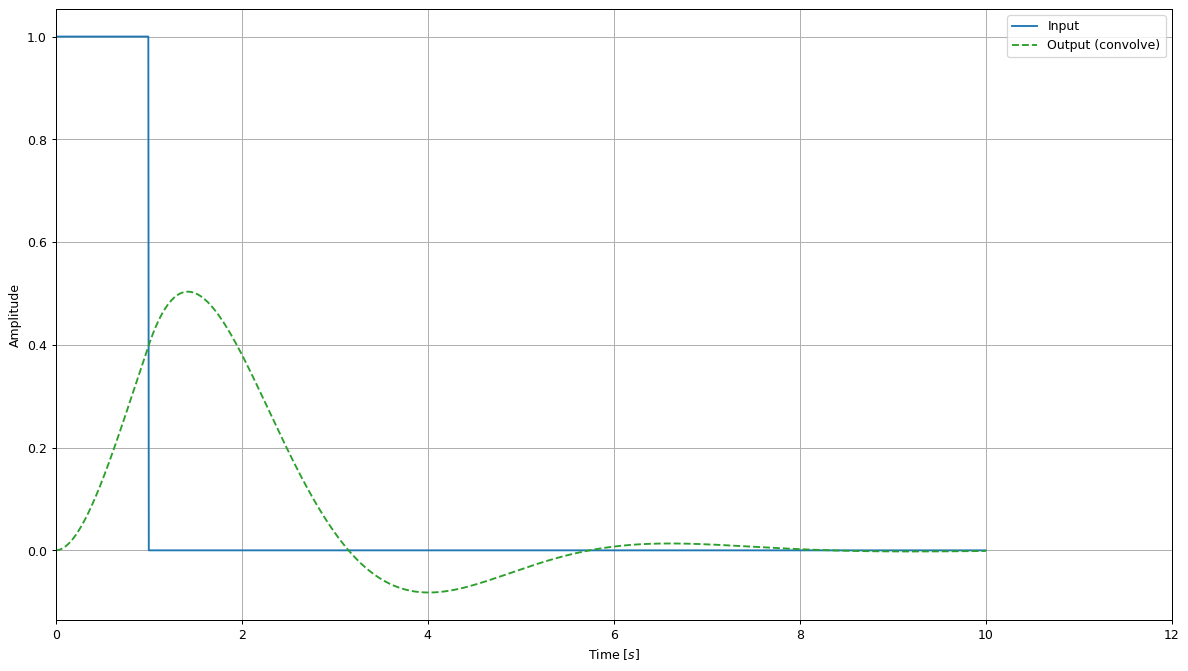

In [ ]:
t = np.linspace(0, 10, 2000)
input_=np.array([1]*200+[0]*1800)
_, output_, _ = lti_system.output(input_, t)
output_c = np.convolve(input_, h)[:t.shape[0]]*((t[-1]/t.shape[0]))

plt.figure(figsize=(16,9),dpi=90)
plt.plot(t, input_, '-', C='C0', label='Input')
plt.plot(t, output_c, '--', C='C2', label='Output (convolve)')

plt.grid(True)
plt.legend()
plt.xlim(0, 12)
plt.xlabel('Time [$s$]')
plt.ylabel('Amplitude')
plt.show()

**respuesta en frecuencia del pulso cuadrado**

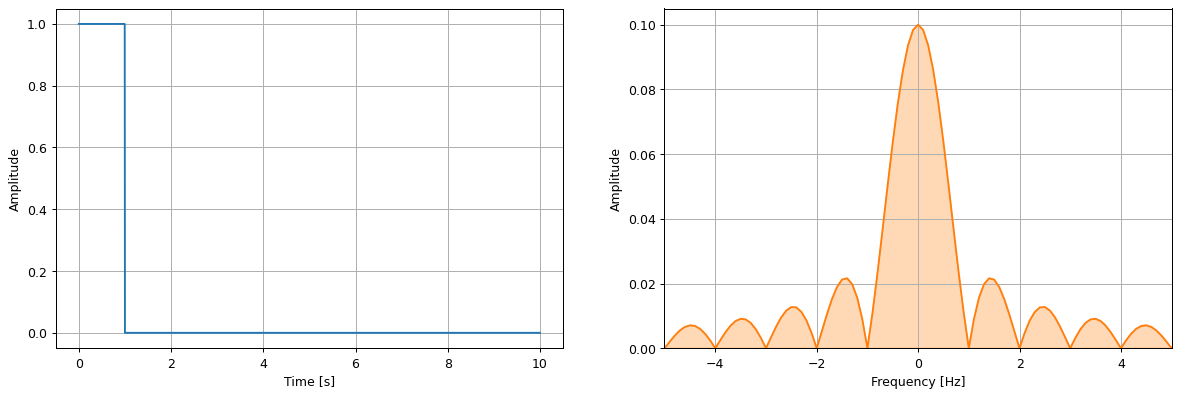

In [ ]:
fft_plot(t,input_,-5,5)

**Respuesta del circuito al pulso en la frecuencia**

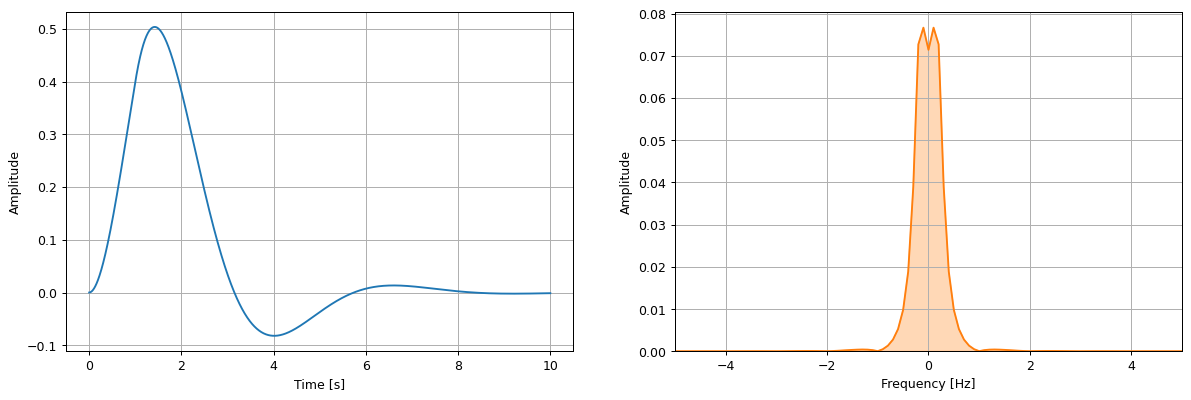

In [ ]:
fft_plot(t,output_c,-5,5)

# **SEGUNDO PUNTO DEL SEGUNDO TALLER "Modulaciones"**
**Definimos portadora**

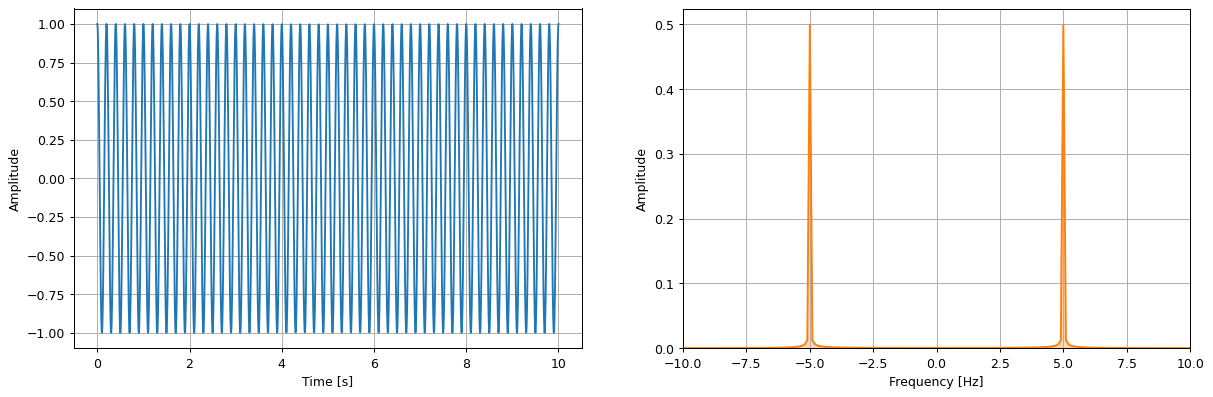

In [ ]:
fp=5
portadora=np.cos(2*np.pi*fp*t)
fft_plot(t,portadora,-fp-5,fp+5)

**Definimos moduladora**

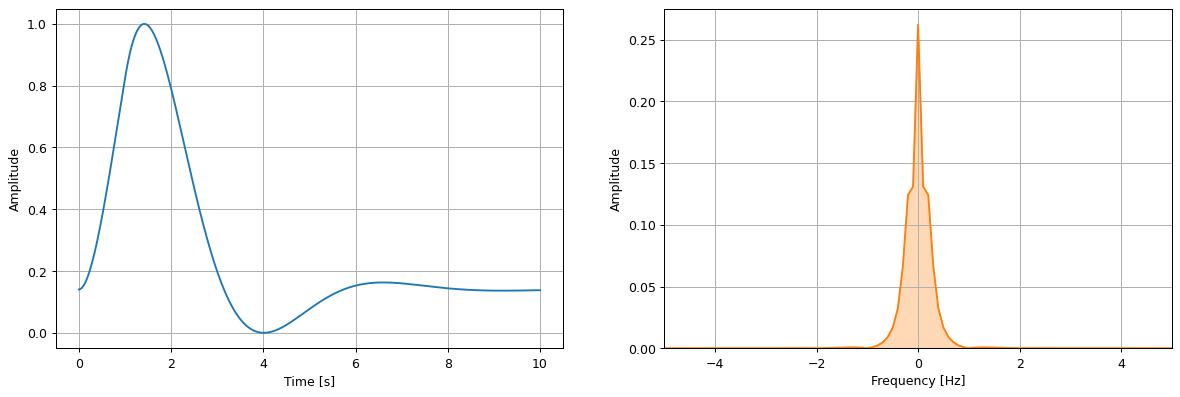

In [ ]:
def normalization(signal):
    """
    Normaliza la señal, dejándola únicamente positiva y variando de 0 a 1
    
    signal: señal
    """
    signal_ = signal.copy()
    signal_ -= signal_.min()  # Se desplaza para que únicamente sea positiva
    signal_ /= signal_.max()  # Se divide por el máximo, para que el dominio sea de 0 a 1
    
    return signal_
l=normalization(output_c)#Se normaliza la salida del circuito
fft_plot(t,l,-5,5)

##AM##
**Modulación de doble banda lateral con portadora suprimida (DSB-SC)**

$$y(t)=a(t)cos(w_ct)$$

En donde

$$a(t)\sim  kx(t)+k_d \hspace{1cm} k,k_d=cte$$

Para esta modulación se asume $k_d=0$ por lo que se tiene

$$y(t)=x(t)cos(w_ct)$$

Cuya densidad espectral esta dada por

$$Y(w)=F(y(t))=\frac{X(w+w_c)+X(w-w_c)}{2}$$



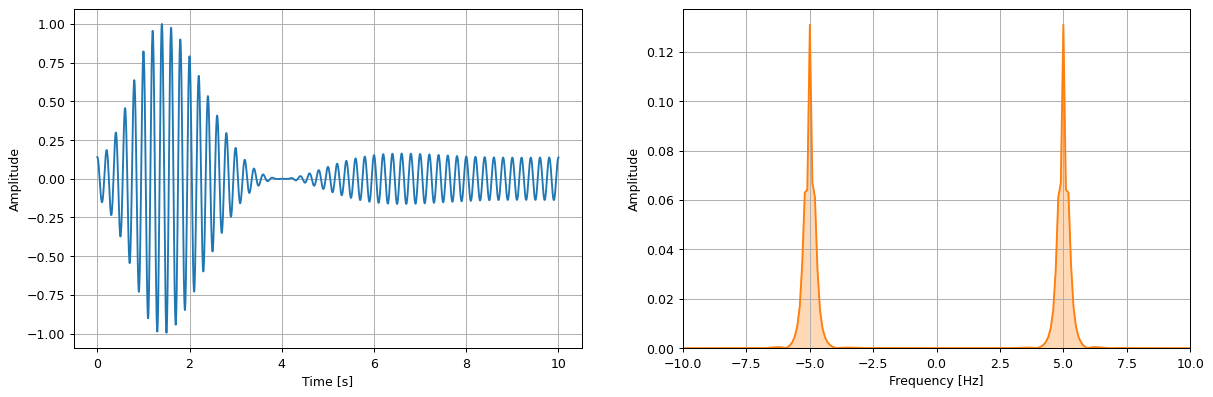

In [ ]:
u = 1

DSBSC = l*portadora*u

fft_plot(t, DSBSC, -10,10)

Para recuperar el mensaje $x(t)$ a partir de la señal modulada, se debe realizar un nuevo traslado en frecuencia y aplicar un filtro pasabajas a la salida, por lo que 

el desplazamiento inverso se obtiene mediante

$$y(t)\Re(e^{-jw_ct})=y(t)cos(w_ct)$$

sabiendo que $y(t)=x(t)cos(w_ct)$

$$y(t)\Re(e^{-jw_ct})=x(t)cos^2(w_ct)=\frac{1}{2}x(t)+\frac{1}{2}x(t)cos(2w_ct)$$

Donde su densidad espectral esta dada por 

$$F(y(t)cos(w_ct))=\frac{1}{2}X(w)+\frac{1}{4}X(w+2w_c)+\frac{1}{4}X(w+2w_c)$$

por lo que aplicando un filtro pasabajos se obtiene

$$\hat x(t)=\frac{1}{2}x(t)$$


**Modulación de doble banda lateral con gran portadora (DSB-LC)**

Se obtienen, si se asume una constante de desplazamiento $k_d$ diferente de cero, por lo que la señal modulada sería

$$y(t)=x(t)cos(w_ct)+k_dcos(w_ct)$$

donde, la correspondiente densidad espectral estaría dada por

$$Y(w)=\frac{1}{2}X(w+w_c)+\frac{1}{2}X(w-w_c)+k_d \pi \frac{1}{2}\delta(w+w_c)+k_d \pi \frac{1}{2}\delta(w-w_c)$$

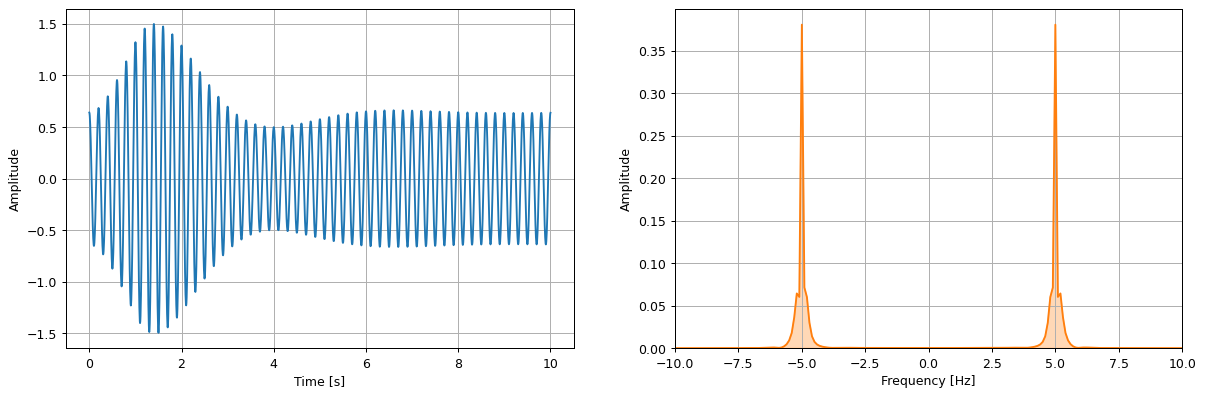

In [ ]:
u = 1
kd=0.5
DSBLC = u*(l*portadora+kd*portadora)

fft_plot(t, DSBLC, -10,10)

**Modulación de banda lateral única (SSB)**
Se basa transmitir el mensaje utilizando solo una de las bandas laterales, se toma una señal DSB de la cual se suprimeuna de las bandas laterales con un filtro.

$$y(t)=x(t)cos(w_ct) \mp \hat x(t)sin(w_ct)$$

Donde la suma representa la banda lateral inferior

$$y(t)=x(t)cos(w_ct)+\hat x(t)sin(w_ct)$$

mientras que la diferencia, representa la banda lateral superior

$$y(t)=x(t)cos(w_ct) - \hat x(t)sin(w_ct)$$

La densidad espectral sería

$$F(y(t))=F(x(t)cos(w_ct)) \mp F(\hat x(t)sin(w_ct))$$
$$Y(w)= \frac{1}{2}X(w-w_c)+\frac{1}{2}X(w+w_c)-(\frac{1}{2j}\hat X(w-w_c)-\frac{1}{2j}\hat X(w+w_c))$$

En donde 

$$\hat X(w \mp w_c)=-jsgn(w \mp w_c)X(w \mp w_c)$$

por lo que 

$$Y(w)= \frac{1}{2}X(w-w_c)(1+sgn(w - w_c))+\frac{1}{2}X(w+w_c)(1-sgn(w + w_c))$$

sabiedo que la funcion signo es

$$sgn(w-wc)=\left\{\begin{matrix}
1 ; w>w_c\\ 
0 ; w<w_c
\end{matrix}\right.$$

En este caso 

$$1 \mp sgn(w-wc)=\left\{\begin{matrix}
2 ; w> \mp w_c\\ 
0 ; w< \mp w_c
\end{matrix}\right.$$

y por lo tanto

$$Y(w)=\left\{\begin{matrix}
0 \hspace{3cm}   ; |w|>w_c\\ 
X(w+w_c) \hspace{1cm} ; w<-w_c\\
X(w-w_c) \hspace{1cm} ; w>w_c
\end{matrix}\right.$$



/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


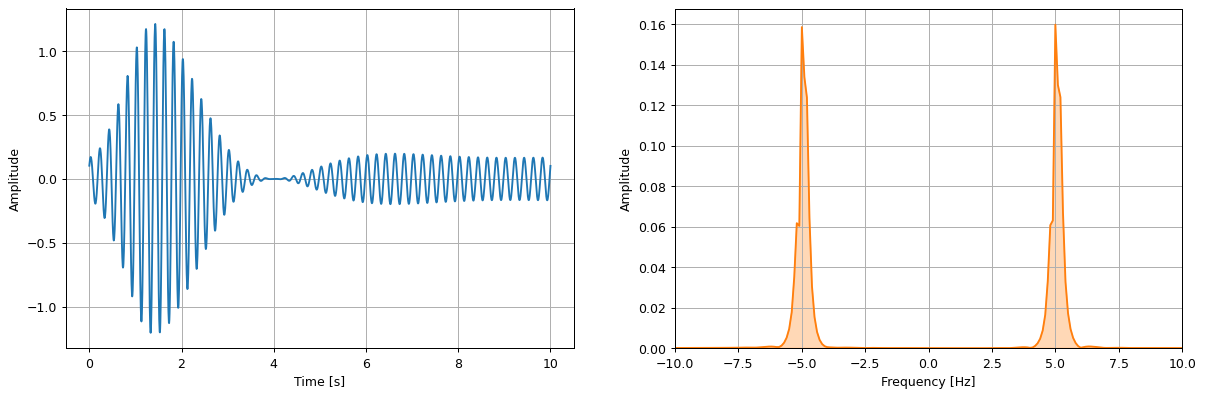

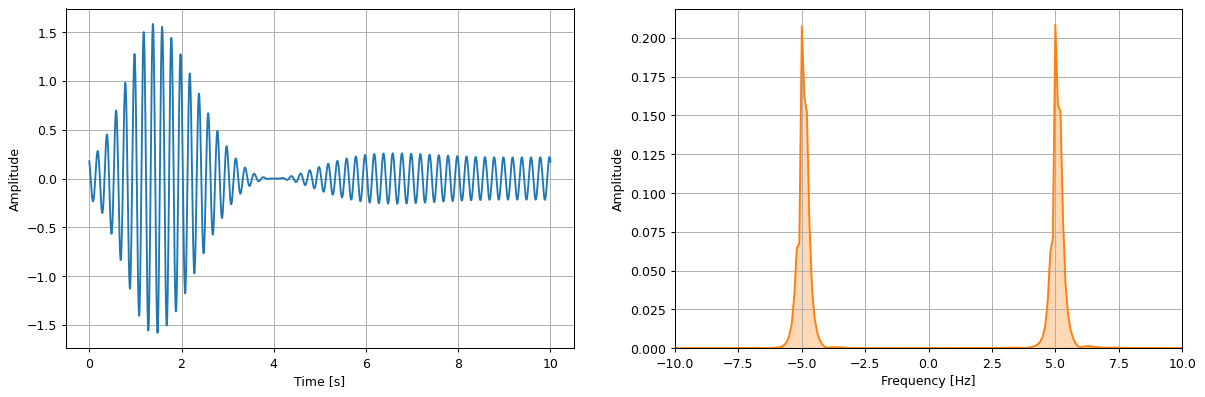

In [ ]:
from scipy.signal import hilbert

segport= np.cos(2*np.pi*fp*(t+np.pi))

#banda lateral superior 
SSBS= DSBSC + u*hilbert(l)*segport
fft_plot(t, SSBS, -10, 10)

#banda lateral inferior 
SSBI= DSBSC - u*hilbert(l)*segport
fft_plot(t, SSBI, -10, 10)



**Modulación por amplitud de pulso (PAM)**

para este caso la señal portadora consiste en un tren de pulsos y la modulación se basa en variar algún parámetro de la señal portadora.

La modulación por amplitud de pulso consiste en la multiplicacion de la señal analogica contínua del mensaje, por un tren de pulsos cuadrados constantes en amplitud, de donde se modula la amplitud de acuerdo al mensaje a enviar

$$y_{PAM}(t)=\sum_K x(KT)rect_\tau (t-KT)$$

donde T es el periodo de muestreo, $x(KT)$ es el valor muestreado de $x(t)$ obteido en el tiempo $t=KT$ y la sumatoria de las funciones $rect_\tau (t)$ representan el tren de pulsos de amplitud $1$ y duracion $\tau$.

También se puede encontral la señal modulada realizando la convolucion entre el mensaje muestreado instantaneamente $x(t)$ y el pulso rectangular $rect_\tau (t)$, donde, el mensaje muestread de forma instantanea esta dado por

$$x_\delta (t)=\sum_K x(KT) \delta (t-KT)$$

entonces

$$y_{PAM}(t)=x_\delta (t)*rect_\tau (t)=\sum_K x(KT)rect_\tau (t-KT)$$

La densidad espectral se encuentra aplicando la propiedad de la transformada de Fourier para la convolución

$$F(y_{PAM}(t))=F(x_\delta (t)*rect_\tau (t))=X_\delta (w) F(rect_\tau (t))$$
$$Y_{PAM}(w)= \frac{\tau}{T} \sum_K X(w-Kw_o) sinc(w \frac{\tau}{2}) $$


**Definimos tren de pulsos como portadora**

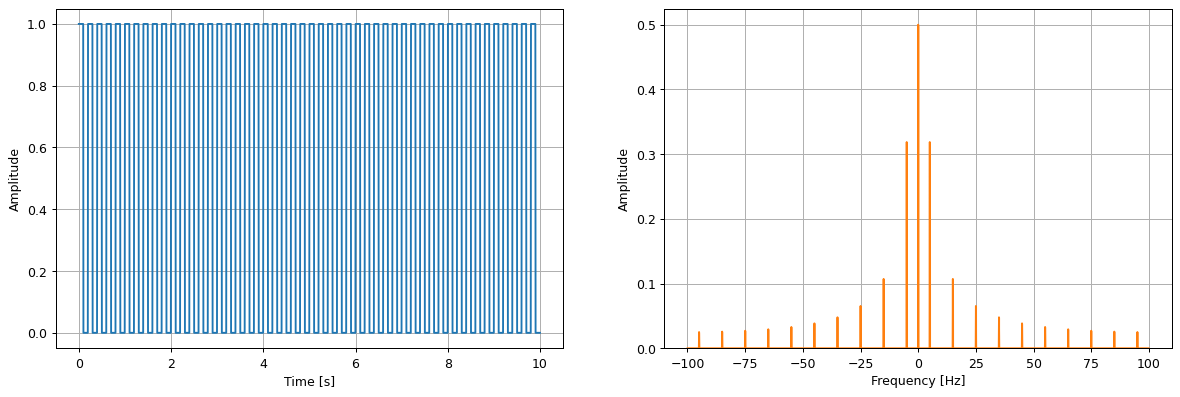

In [ ]:
def pulse_train(t, pulses=10):
    """
    Define un tren de pulsos.
    
    t: vector de tiempo
    pulses: número de pulsos
    
    """
    width = (t.max()-t.min())/(pulses)
    
    return t, np.array(t%width*2<(width), dtype=np.int)

pulses = 50
t, tren = pulse_train(t, pulses)

fft_plot(t, tren)

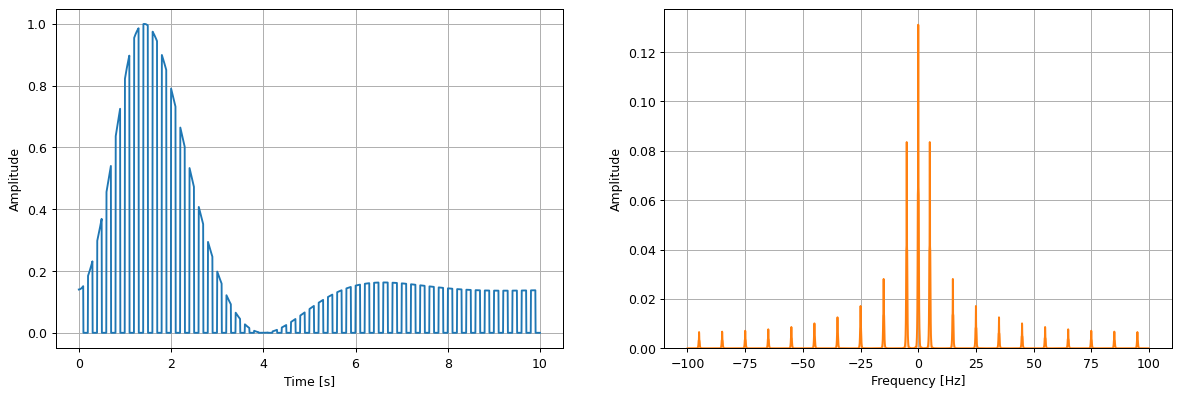

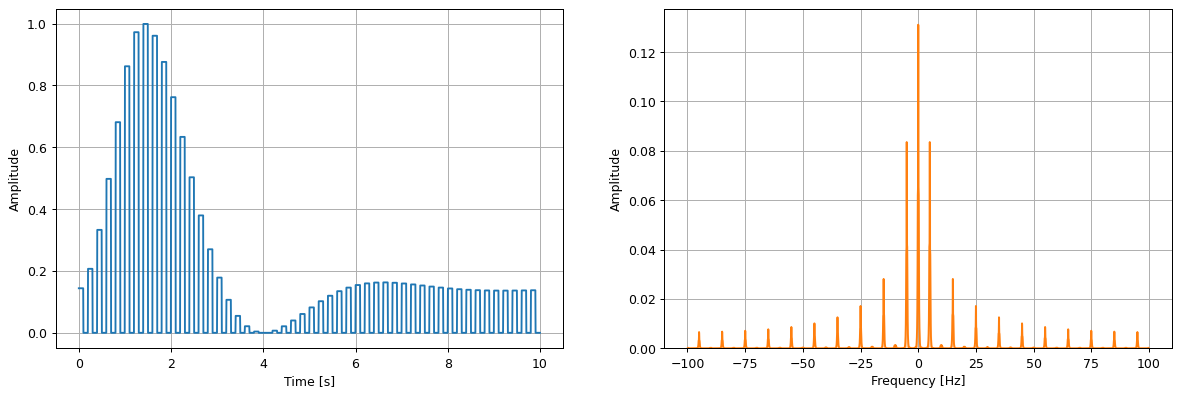

In [ ]:
#muestreo natural
PAMN = tren * l
fft_plot(t, PAMN)

#muestreo con pulsos de amplitud plana
PAMR = np.array([[pulse.mean()]*pulse.shape[0] for pulse in PAMN.reshape(-1, PAMN.shape[0]//(pulses*2))]).reshape(-1, )
fft_plot(t, PAMR)

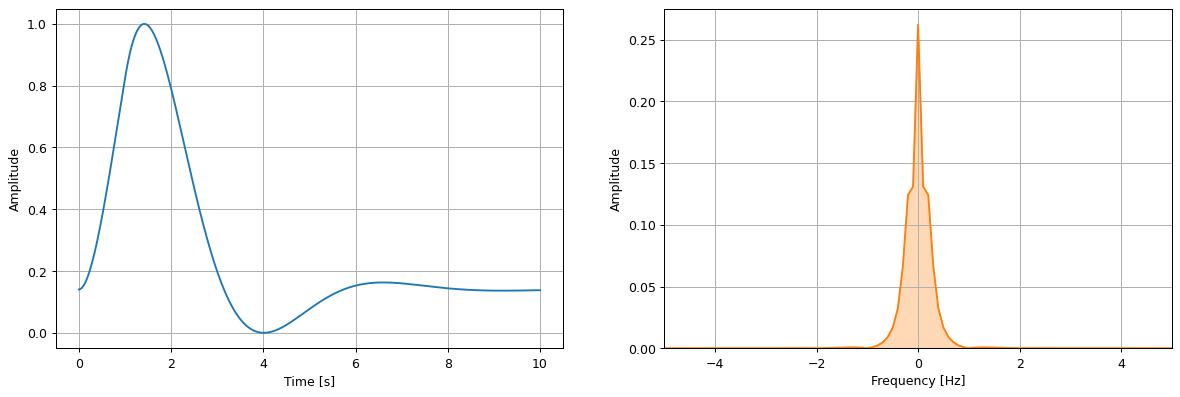

In [ ]:
fft_plot(t,l,-5,5)

**Modulacion** **FM**

La modulacion Fm se basa en la frecuencia y se define de la siguiente forma.

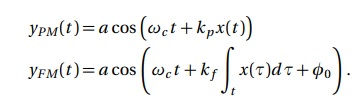

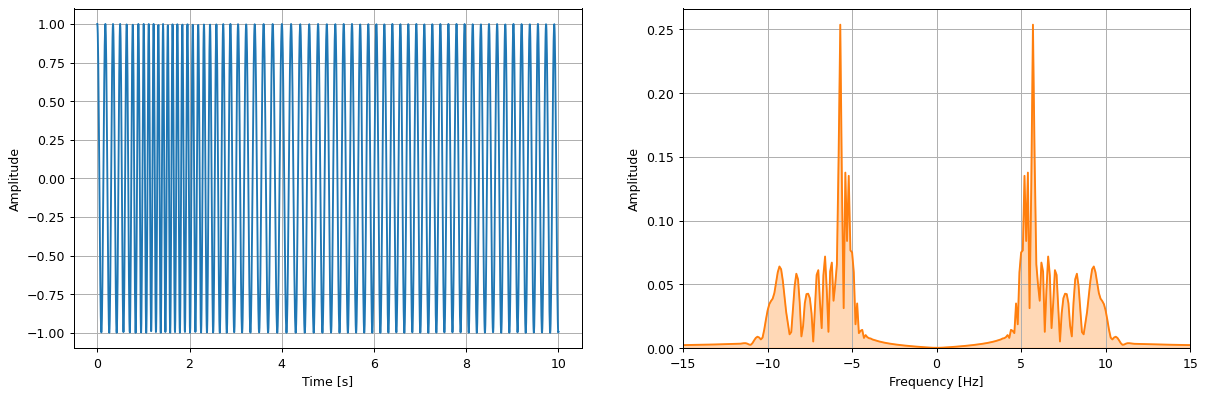

In [ ]:
#FM
from scipy.integrate import cumtrapz
beta = 30

fm = np.cos(2*np.pi*fp*t + beta*cumtrapz(l, t, initial=0))

fft_plot(t, fm, -15, 15)



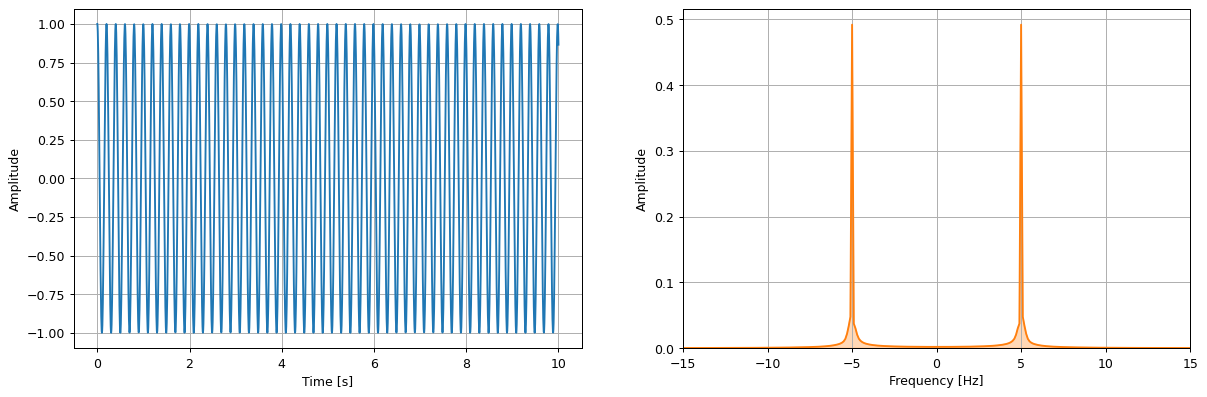

In [ ]:
#NBFM
beta = 0.2

nbfm = np.cos(2*np.pi*fp*t + beta*cumtrapz(l, t, initial=0))

fft_plot(t, nbfm, -15, 15)

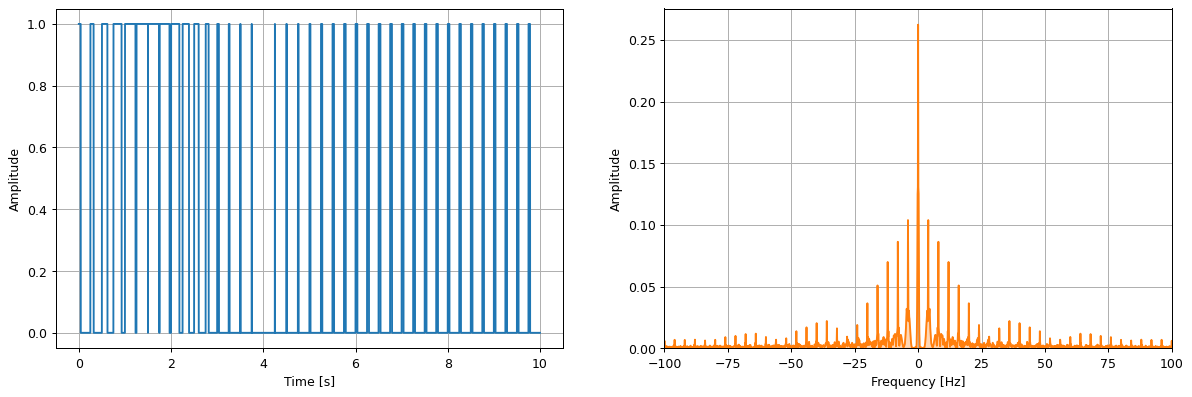

In [ ]:
#PWM
pulses = 40
t, train = pulse_train(t, pulses)

l_ = normalization(l.reshape(pulses, -1).mean(axis=1))

pwm = np.array([np.array(np.linspace(0, 1, 1000)<m, dtype=np.int) for m in l_]).reshape(-1)
t_ = np.linspace(t[0], t[-1], pwm.shape[0])

fft_plot(t_, pwm, -100, 100)